In [100]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_state_qsphere, plot_state_city
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def get_contrast_color(rgba):
    r, g, b, alpha = rgba
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if luminance > 0.5 else 'white'

def plot_vector_state(state):
    probabilities = state.probabilities()
    amplitudes = np.abs(state.data)
    phases = np.angle(state.data)

    # Etiquetas para cada estado
    n_qubits = state.num_qubits
    labels = [format(i, f'0{n_qubits}b') for i in range(2**n_qubits)]
    
    # Color de la barra en función de la fase
    norm = plt.Normalize(-np.pi, np.pi)
    colors = cm.hsv(norm(phases)) 
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(5, 3))
    bars = ax.bar(labels, probabilities, color=colors)
    
    # Añadimos los colores
    sm = cm.ScalarMappable(cmap='hsv', norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Fase (Radianes)')

    # Añadimos etiquetas con el ángulo de fase para que sepamos cual es (el color no tiene leyenda)
    for rect, phase, prob, color in zip(bars, phases, probabilities, colors): #Iteramos por las barras, las fases y las probabilidades "todo en uno"
        # Si no es un estado posible, no le ponemos la fase
        if prob > 0.001:
            height = rect.get_height()
            
            angle_text = f"{np.degrees(phase):.0f}°"

            ax.text(
                rect.get_x() + rect.get_width() / 2, #La posición de la barra
                height - 0.06, #La altura por debajo de la barra
                angle_text, 
                ha='center', 
                va='bottom', 
                fontsize=9,  
                fontweight='normal',
                color=get_contrast_color(color)
            )
    
    # Leyendas
    ax.set_ylabel('Probabilidad')
    ax.set_title('Amplitud (Altura) y Fase (Color) del Estado')
    ax.set_ylim(0, max(probabilities) * 1.1)

    for bar in bars:
        bar.set_edgecolor('black')
        
    plt.show()
    
def display_all(qc):
    state = Statevector.from_instruction(qc)
    display(qc.draw('mpl'))
    display(plot_state_qsphere(state))
    display(plot_vector_state(state))
    print(state.draw('latex').data)



In [101]:
qc = QuantumCircuit(3)


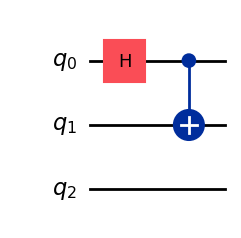

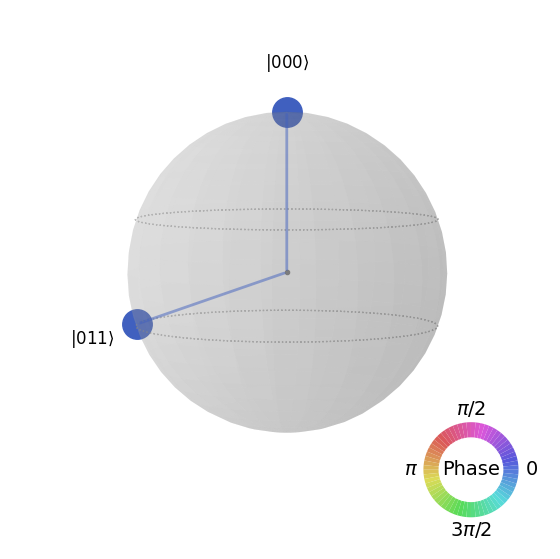

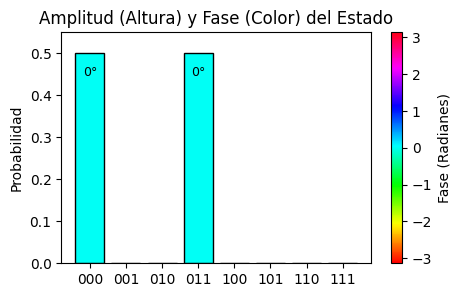

None

$$\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2}}{2} |011\rangle$$


In [102]:
qc.h(0)
qc.cx(0, 1)
display_all(qc)

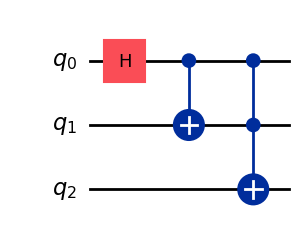

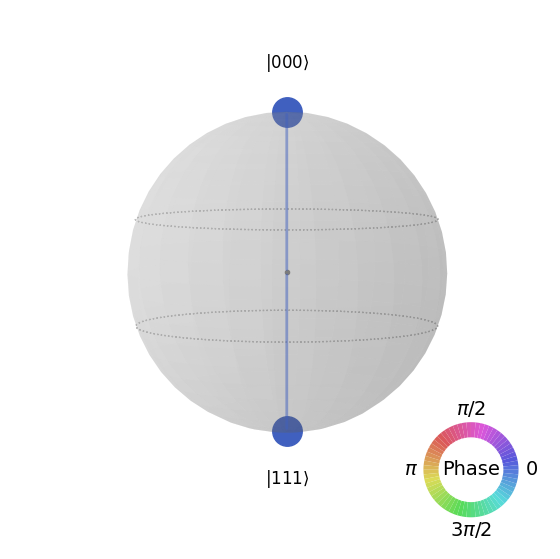

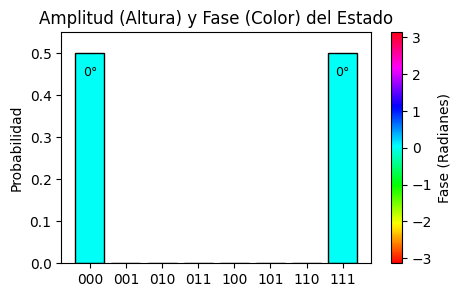

None

$$\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2}}{2} |111\rangle$$


In [103]:
qc.ccx(0, 1, 2)
display_all(qc)

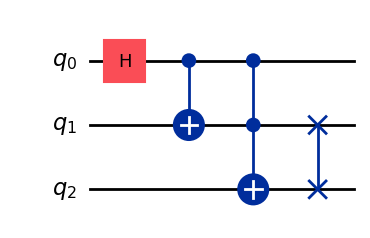

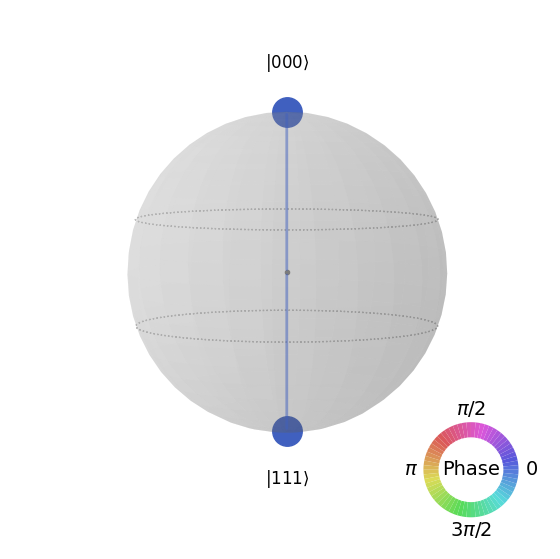

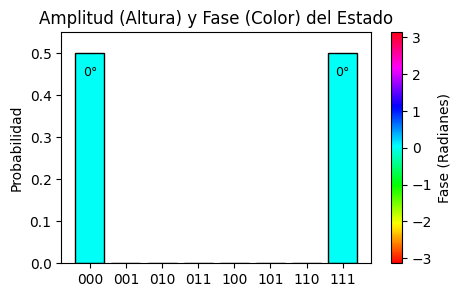

None

$$\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2}}{2} |111\rangle$$


In [104]:
qc.swap(1, 2)
display_all(qc)

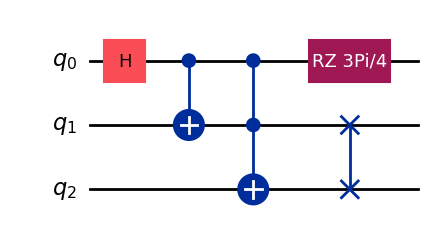

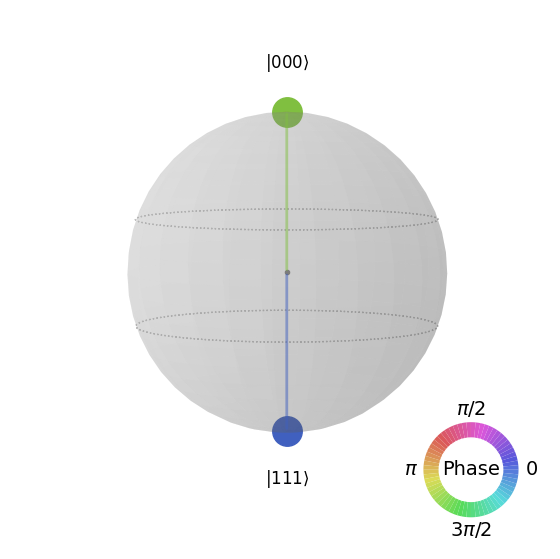

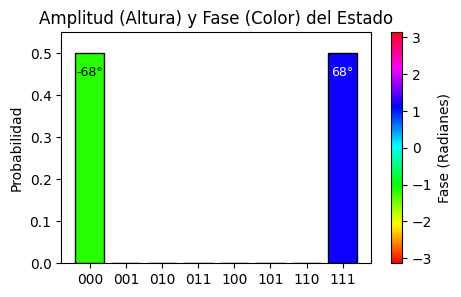

None

$$(0.2705980501 - 0.6532814824 i) |000\rangle+(0.2705980501 + 0.6532814824 i) |111\rangle$$


In [105]:
# Hagamos una puerta que produzca una rotación de fase de 3*Pi/4. 
alpha = 3 * np.pi / 4

# Tenemos que calcular la matriz de rotación
c = np.cos(alpha / 2)
s = np.sin(alpha / 2)

term_00 = np.cos(alpha / 2) - 1j *  np.sin(alpha / 2) # cos - i*sin
term_11 = np.cos(alpha / 2) + 1j *  np.sin(alpha / 2)  # cos + i*sin

matrix_rz_3pi4 = [
    [term_00, 0],
    [0,       term_11]
]

custom_gate = UnitaryGate(matrix_rz_3pi4, label="RZ 3Pi/4")
qc.append(custom_gate, [0])
display_all(qc)